<a href="https://colab.research.google.com/github/PradeepKumarM30/WinterSemester2020-21/blob/DeepLearning/20MAI0030EX1/QNO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Change the directory to required format
cd sample_data

/content/sample_data


In [13]:
#unzip the data loaded from loacl disk
!unzip classified_data.zip


Archive:  classified_data.zip
   creating: data/
   creating: data/test/
   creating: data/test/cat/
  inflating: data/test/cat/cat.1.jpg  
  inflating: data/test/cat/cat.10.jpg  
  inflating: data/test/cat/cat.100.jpg  
  inflating: data/test/cat/cat.10000.jpg  
  inflating: data/test/cat/cat.10015.jpg  
   creating: data/test/dog/
  inflating: data/test/dog/dog.10003.jpg  
  inflating: data/test/dog/dog.10008.jpg  
  inflating: data/test/dog/dog.10009.jpg  
  inflating: data/test/dog/dog.10024.jpg  
  inflating: data/test/dog/dog.10058.jpg  
   creating: data/train/
   creating: data/train/cat/
  inflating: data/train/cat/cat.0.jpg  
  inflating: data/train/cat/cat.10003.jpg  
  inflating: data/train/cat/cat.10004.jpg  
  inflating: data/train/cat/cat.10008.jpg  
  inflating: data/train/cat/cat.1002.jpg  
  inflating: data/train/cat/cat.10028.jpg  
  inflating: data/train/cat/cat.10066.jpg  
  inflating: data/train/cat/cat.10125.jpg  
  inflating: data/train/cat/cat.10148.jpg  
  inf

In [40]:
#load imports
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
#giving the file paths for the required files and naming them to our required format
labels = ['dog', 'cat']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [16]:
#split into train and validation
train = get_data('/content/sample_data/data/train')
val = get_data('/content/sample_data/data/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


Text(0.5, 1.0, 'dog')

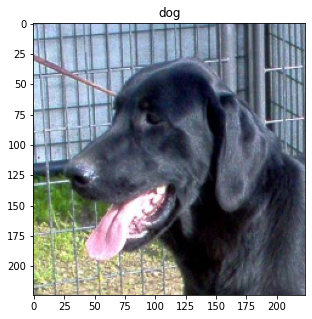

In [17]:
  #Now we will look into some sample images
  plt.figure(figsize = (5,5))
  plt.imshow(train[1][0])
  plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'cat')

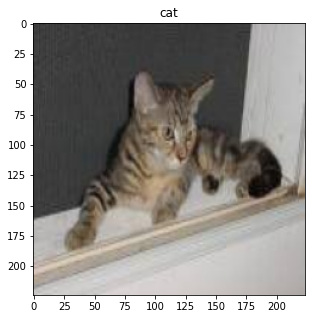

In [18]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [19]:
#Feature extraction and scaling the image to required format
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [23]:
#Reshape all image to change it to the classifier required format
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2] * x_train.shape[3])

In [26]:
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1] * x_val.shape[2] * x_val.shape[3])

In [27]:
y_val.shape

(10,)

In [29]:
x_val.shape

(10, 150528)

In [30]:
#model fitting
from sklearn import ensemble


In [35]:
classifier=ensemble.AdaBoostClassifier()
classifier.fit(x_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [36]:
y_pred = classifier.predict(x_val)
score=classifier.score(x_val,y_val)
score

0.7

In [38]:
conf_mat = confusion_matrix(y_val, y_pred)


PRADEEP KUMAR M - 20MAI0030


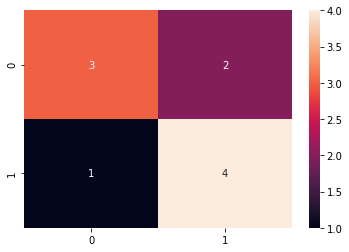

In [39]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
print('PRADEEP KUMAR M - 20MAI0030')

In [41]:
f1_score(y_val, y_pred)


0.7272727272727272

In [42]:
precision_score(y_val, y_pred)

0.6666666666666666

In [43]:
recall_score(y_val, y_pred)

0.8